# Solution for Homework 8

In all problems below, please comment your code sufficiently well so that the grader can follow what you are doing with ease. For non-coding answers, please make sure to formulate your explanation and answers in the form of complete English sentences. It is not sufficient to just leave comments in the code (without full sentence explanations in problems that ask for those) or vice versa (to leave full sentence explanations but not code comments). You will need both to get full credit. 

## Problem 1

We're continuing to practice data wrangling with Pandas. The dataset we'll consider for this problem is a CDC dataset on COVID-19 rates of hospitalization and deaths by age group and vaccination status. The data can be downloaded from [the CDC website](https://data.cdc.gov/Public-Health-Surveillance/Rates-of-COVID-19-Cases-or-Deaths-by-Age-Group-and/3rge-nu2a/data). Please download the dataset directly from the CDC website (click on the Export button (see image on Canvas) and choose the "csv for Excel" option. Do not make any changes to the csv file before importing it into Pandas. 

**Note:** Some of the "strange behavior" the problem below is talking about is platform specific. It may occur on some platforms (MacOS, Windows, Linux) but not others. If you don't see strange behavior in the file you downloaded from the CDC, check out the csv file from Canvas. 

The variables in this dataset are:
* outcome (case or death)
* month
* MMWR week (epidemiological weeks of the year, ranging from Sunday to Saturday)
* Age group
* Vaccine product
* Vaccinated with outcome (means fully vaccinated 
with one full series of shots)
* Fully vaccinated population 
* Unvaccinated (partially vaccinated people are not included in this data set)
* Unvaccinated population 
* Crude vax IR (incidence rates: ratio of vaccinated case/vaccinated population)*100k
* Crude unvax IR (incidence rates: ratio of unvaccinated case/unvaccinated population)*100k
* Crude IRR (incidence rate ratio: ratio of crude vax IR/Crude unvax IR)
* Age adjusted vax IR (there are not equally many people in all the age groups. When age groups are combined, the IR is a weighted average of the groups)
* Age adjusted unvax IR (see above)
* Age adjusted IRR (see above)
* Continuity correction (fineprint from the CDC website says: "Continuity correction: A continuity correction has been applied to the denominators by capping the percent population coverage at 95%. To do this, we assumed that at least 5% of each age group would always be unvaccinated in each jurisdiction. Adding this correction ensures that there is always a reasonable denominator for the unvaccinated population that would prevent incidence and death rates from growing unrealistically large due to potential overestimates of vaccination coverage.")

This is a true data wrangling problem. The purpose of this exercise is to illustrate what frequently happens when you work with data downloaded in some format (here csv) from some reputable source. In your real jobs, you would have to identify all the issues yourself (which is usually the most time consuming part). When working with these data, one would like to probably graph COVID-19 rates as a function of time, vaccine status, age-group etc. 

(a) Import the csv file into Pandas as a Data Frame named 'data'. What is the current data type of the column 'Crude vax IR'? We would like the entries in this column to be numeric. Convert them to floats. 

Hint: There is something that currently prevents you from just converting them to numeric with the command ```pd.to_numeric()```. Find out what that is. Describe the issue in the markdown box below and fix it. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file = "/Users/mbremer/SJSU/Math167PS/Data/HomeworkData/Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv"
data = pd.read_csv(file)

data['Crude vax IR'] = [val.replace(',', '') for val in data['Crude vax IR'].values] # remove comma from values
data['Crude vax IR'] = pd.to_numeric(data['Crude vax IR']) # convert objects to numerical data type

# uncomment this line when you're done so that the grader can see the result of your conversion
print(data['Crude vax IR'].values.dtype)

display(data)

float64


,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
0,case,4-Apr,202114,17-Dec,all_types,5,"28,556","27,434","16,540,090",17.509455,165.8636682,9.472806,NaN,NaN,NaN,0
1,case,4-Apr,202114,18-29,all_types,561,"2,231,629","67,444","29,726,945",25.138587,226.8783422,9.025103,NaN,NaN,NaN,0
2,case,4-Apr,202114,30-49,all_types,"1,559","6,313,680","86,132","39,700,511",24.692414,216.9543863,8.786277,NaN,NaN,NaN,0
3,case,4-Apr,202114,50-64,all_types,"1,292","6,119,063","43,723","22,761,438",21.114344,192.0924328,9.097722,NaN,NaN,NaN,0
4,case,4-Apr,202114,65-79,all_types,"1,413","12,585,675","12,478","8,475,327",11.227050,147.2273577,13.113628,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,death,1-Jan,202204,80+,all_types,"1,089","6,068,485","1,303","1,079,300.80",17.945171,120.7263073,6.727510,NaN,NaN,NaN,1
905,death,1-Jan,202204,all_ages_adj,all_types,"2,253","119,998,777.50","3,410","52,155,970.90",1.877519,6.538081721,3.482298,1.254705231,12.57900914,10.025470,1
906,death,1-Jan,202204,all_ages_adj,Janssen,228,"9,191,906","3,410","51,729,584.90",2.480443,6.591972479,2.657579,2.70320132,12.57900914,4.653375,1
907,death,1-Jan,202204,all_ages_adj,Moderna,937,"42,328,474","3,410","51,764,634.90",2.213640,6.587509033,2.975872,1.1234466,12.57900914,11.196802,1


The current entries in the 'Crude vac IR' column are "objects" in Pandas. Large numbers (those larger than 1,000) have a comma in them. The comma prevents the `pd.to_numeric()` method from working. We can get rid of the commas and then apply the conversion. 

(b) Write Pandas code to create a new column 'Time' in format yyyy/mm. You can get the year information out of the `MMWR week` column and the month out of the 'month' column. Please pad the months (04 instead of 4) so that the times in yyyy/mm format can be ordered meaningfully. Display your modified data frame so that the grader can see it. Put your new 'Time' column on the left so that the grader can see it without scrolling.

**Example:** If month is `4-Apr` and MMWR week is 202114, then `Time` should be 2021/04.

In [3]:
cols = list(data.columns)

data['Month'] = [x.split("-")[0].zfill(2) for x in list(data.month.values)]
        # split the Months and keep the number before the "-". Pad single digits with a zero in front.
data['Year'] = [str(x)[:4] for x in list(data['MMWR week'].values)]
        # extract the first four characters of the MMWR values
data['Time'] = data.Year + "/" + data.Month
        # concatenate the year with a slash and the padded months

data = data[['Time'] + cols] # reorder the columns to put the "Time" column first
data

,Time,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
0,2021/04,case,4-Apr,202114,17-Dec,all_types,5,"28,556","27,434","16,540,090",17.509455,165.8636682,9.472806,NaN,NaN,NaN,0
1,2021/04,case,4-Apr,202114,18-29,all_types,561,"2,231,629","67,444","29,726,945",25.138587,226.8783422,9.025103,NaN,NaN,NaN,0
2,2021/04,case,4-Apr,202114,30-49,all_types,"1,559","6,313,680","86,132","39,700,511",24.692414,216.9543863,8.786277,NaN,NaN,NaN,0
3,2021/04,case,4-Apr,202114,50-64,all_types,"1,292","6,119,063","43,723","22,761,438",21.114344,192.0924328,9.097722,NaN,NaN,NaN,0
4,2021/04,case,4-Apr,202114,65-79,all_types,"1,413","12,585,675","12,478","8,475,327",11.227050,147.2273577,13.113628,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,2022/01,death,1-Jan,202204,80+,all_types,"1,089","6,068,485","1,303","1,079,300.80",17.945171,120.7263073,6.727510,NaN,NaN,NaN,1
905,2022/01,death,1-Jan,202204,all_ages_adj,all_types,"2,253","119,998,777.50","3,410","52,155,970.90",1.877519,6.538081721,3.482298,1.254705231,12.57900914,10.025470,1
906,2022/01,death,1-Jan,202204,all_ages_adj,Janssen,228,"9,191,906","3,410","51,729,584.90",2.480443,6.591972479,2.657579,2.70320132,12.57900914,4.653375,1
907,2022/01,death,1-Jan,202204,all_ages_adj,Moderna,937,"42,328,474","3,410","51,764,634.90",2.213640,6.587509033,2.975872,1.1234466,12.57900914,11.196802,1


(c) What are the current levels (i.e., possible values) of the variable 'Age group'? Speculate on how the strange values may have arisen. Fix the issue in Pandas. With the exception of the '80+' and the 'all_ages_adj' categories, all other categories should be of the form 'n-m', where both n and m are integers. 

In [4]:
print(list(set(data['Age group'].values)))# find strange values

data['Age group'].replace('17-Dec', '12-17', inplace = True) # replace 17-Dec with 12-17 age group
data['Age group'].replace('11-May', '5-11', inplace = True)  # replace 11-May with 5-11 age group

print(list(set(data['Age group'].values)))

# data.loc[data['Age group']=='17-Dec']['Age group fixed']='12-17'

['30-49', '65-79', '17-Dec', 'all_ages_adj', '18-29', '11-May', '80+', '50-64']
['30-49', '12-17', '65-79', 'all_ages_adj', '18-29', '5-11', '80+', '50-64']


Excel "helpfully" converts entries such as 12-17 into date format (17-Dec). We can replace values to undo this conversion and work with more meaningful age groups. 

## Problem 2

We will continue to practice investigating a data set through visualizations. You can download "Avocado_2019-21.csv" from Canvas. This data set contains information on weekly Hass Avocado sales in the US in 2019-2021. The data comes from the [Hass Avocado Board](https://hassavocadoboard.com/) website. The variables in the file are 

* ```Geography``` - The area of the observation
* ```Geography_type``` - The type of the area (city, region, country). 
* ```Timeframe``` - all weeekly 
* ```Current Year Week Ending``` - the week the observations were collected from
* ```Type``` - conventional or organic
* ```ASP Current``` - the current average sales price of a single avocado
* ```Total Bulk and Bags Units``` - Total sales volume
* ```4046 Units``` - Total number of avocados with PLU 4046 sold (small Hass Avocado)
* ```4225 Units``` - Total number of avocados with PLU 4225 sold (medium Hass Avocado)
* ```4770 Units``` - Total number of avocados with PLU 4770 sold (large Hass Avocado)
* ```Total Bagged Units``` - Total number of avocados sold in bags
* ```SmlBagged Units```, ```LrgBagged Units```, ```X-LrgBagged Units``` is number of bags sold in different sizes
* ```Bulk GTIN``` is produce sold in bulk to institutions such as restaurants


Your job: Take these data and create four meaningful graphs. It is a good idea to subset the data and consider only a subset for each problem part. Each graph should be sufficiently well labeled so that a reader can understand what your graph shows without reading any additional explanations. In addition to each graph, write a short paragraph (a few sentences per graph) that explain what your graph shows and that interpret for the viewer what can be seen in your graph. For example, if you are drawing a graph to compare two populations, you should state whether there are any differences between the populations and if so, describe what these differences are.

Note, that the rows in the data set correspond to geographical regions of the US. The regions are not mutually exclusive. For instance, you can find "San Francisco", "California", "West", and "Total US". Since "San Francisco" is part of "California" which is part of the "West" which is part of the "Total US", it would **not** make sense to average values from those rows. 

(a) Investigate the distribution of a *single* variable in the data set. 

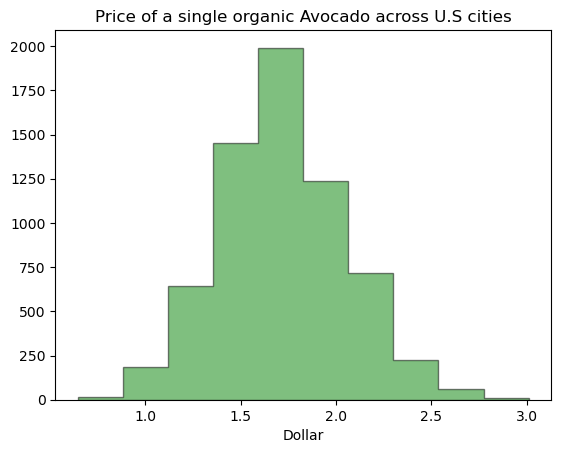

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file = "/Users/mbremer/SJSU/Math167PS/Data/HomeworkData/Avocado_2019-21.xlsx"
data = pd.read_excel(file)

price = data[(data.Type=='Organic') & (data['Geography_type']=='City')]['ASP Current Year'] # subset the data

plt.hist(price, bins=10, alpha=0.5,
                    histtype='stepfilled', color='green',
                    edgecolor='k')   # make histogram
plt.xlabel('Dollar')
plt.title('Price of a single organic Avocado across U.S cities');

**Description:** The price for a single organic Avocado in U.S. cities ranges from about \\$0.72 - \\$2.78 with most Avocados costing between \\$1.20 and \\$2.00. 

(b) Investigate the relationship between *exactly two* variables in the data set. 

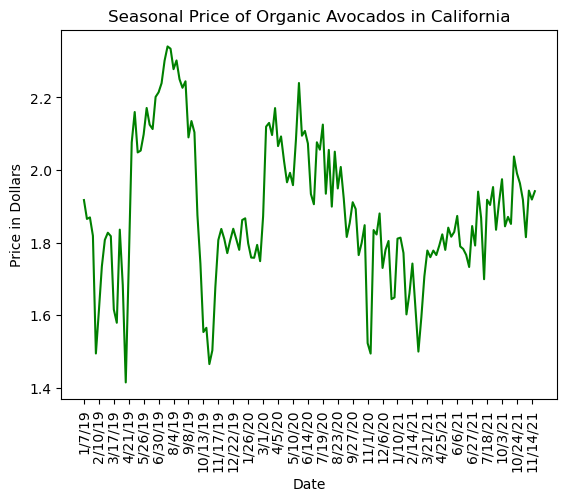

In [6]:
data_subset = data[(data.Geography == 'California')&(data.Type == 'Organic')] # subset the data

date = data_subset['Current Year Week Ending']
ASP = data_subset['ASP Current Year']

date = [date.split()[0] for date in list(date.values)] # use only the day/month/year information
x_pos = range(len(date))

plt.plot(x_pos, ASP, 'g-') # create line plot
plt.xticks(x_pos[::5], date[::5], rotation = 90)
plt.xlabel('Date')
plt.ylabel('Price in Dollars')
plt.title('Seasonal Price of Organic Avocados in California');

**Description:** The price of organic avocados in California is seasonal with prices being higher in the summer months (April - September). In the COVID-19 year of 2021, prices were lower even across the summer months. 

(c) Investigate the relationship between *exactly three* variables in the data set in a single graph. 

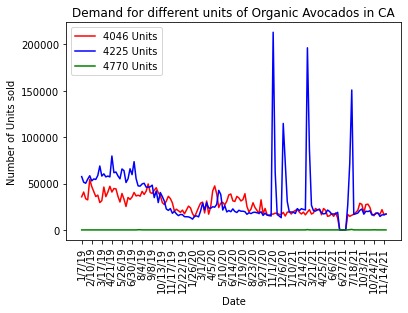

In [43]:
data_total = data[(data.Geography == 'California')&(data.Type == 'Organic')] # subset the data

date = data_total['Current Year Week Ending']
Unit4046 = data_total['4046 Units']
Unit4225 = data_total['4225 Units']
Unit4770 = data_total['4770 Units']

date = [date.split()[0] for date in list(date.values)]
x_pos = range(len(date))

plt.plot(x_pos, Unit4046, 'r-', label = '4046 Units')
plt.plot(x_pos, Unit4225, 'b-', label = '4225 Units')
plt.plot(x_pos, Unit4770, 'g-', label = '4770 Units')

plt.xticks(x_pos[::5], date[::5], rotation = 90)
plt.legend()

plt.xlabel('Date')
plt.ylabel('Number of Units sold')
plt.title('Demand for different units of Organic Avocados in CA');
### END SOLUTION

**Description:** There are seasonal differences between the different sizes of organic avocado sold in California with proportionally more avocado being sold in the summer months. Demand for small and medium sized avocado is generaly much larger than for large sizes. It is strange that in the summer of 2019 medium sized avocados were more popular than small, whereas in the summer of 2020, small were more poular than medium. There are remarkable spikes in the demand for medium sized avocados in late 2020 and in 2021. With units sold reaching between 150k and 200k whereas in most other months units sold are around or below 50k. 

(d) Investigate the relationship between *exactly four* variables in the data set using a panel plot.

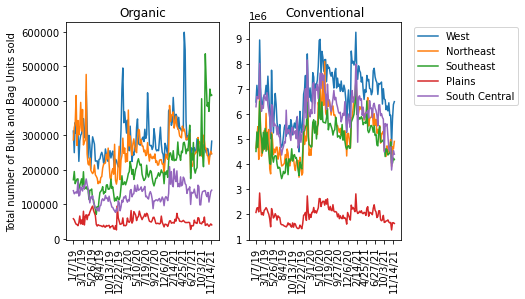

In [50]:
### BEGIN SOLUTION 
data_West = data[(data.Geography == 'West')]
data_Northeast = data[(data.Geography =='Northeast')]
data_Southeast = data[(data.Geography =='Southeast')]
data_Plains = data[(data.Geography == 'Plains')]

regions = ['West', 'Northeast', 'Southeast', 'Plains', 'South Central'] 

date = data_West[data_West.Type == 'Organic']['Current Year Week Ending']
date = [date.split()[0] for date in list(date.values)]
x_pos = range(len(date))

fig, ax = plt.subplots(1,2) 

for region in regions:
    ax[0].plot(x_pos, data[(data.Geography == region) & (data.Type=='Organic')]['Total Bulk and Bags Units'], label = region)
    ax[1].plot(x_pos, data[(data.Geography == region) & (data.Type=='Conventional')]['Total Bulk and Bags Units'], label = region)


ax[0].set_xticks(x_pos[::10])
ax[0].set_xticklabels(date[::10], rotation = 90)

ax[1].set_xticks(x_pos[::10])
ax[1].set_xticklabels(date[::10], rotation = 90)

ax[0].set_title('Organic')
ax[1].set_title('Conventional')
ax[0].set_ylabel('Total number of Bulk and Bag Units sold')
ax[1].legend(bbox_to_anchor=(1.8, 1.));
### END SOLUTION

**Description:** Demand for conventional avocados is generally higher than demand for organic avocados. There is a seasonal component to demand with large spikes in demand for organic avocados in the west. In 2019, the demand for organic avocados in the Northeast is unusually large and in late 2021, the demand for organic avocados in the southeast is unusually large.

**Note:** There are many possible solutions for this problem. You don't have to show the same graphs you'll see in the solution to obtain full credit. Here are the criteria that we will be grading on:

* did you pick non-trivial variable(s) to display (e.g., the distributions of "year" or "date" by themselves are not interesting)?
* do your graphs show exactly one, two, three or four variables as requested? 
* is your graph labeled sufficiently well so that it's easy to understand what one is looking at? 
* does the type of your graph make sense for the variable(s) you chose to display? (e.g., a bar graph of "Year" as a function of "Region" would not make any sense). 
* does your explanation make sense and fit the graph you created?